In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
# Importing the required packages

import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("books.csv")   # importing the file. No need to give full path since file and notebook are in the same directory
data.head()                       # Printing the head of the file to verify the loading of the file.

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [4]:
'''
Q1: How many rows and columns are there in books.csv dataset?
Approach : "shape" is a dataframe attribute that returns a tuple containing the number of rows and columns of the given dataframe.
'''

rows, columns = data.shape        
print(f"The number of rows is {rows}, and the number of columns is {columns}")

The number of rows is 399, and the number of columns is 24


In [5]:
'''
Q2: How many books do not have an original title?
Approach : ".isnull()" is a function applied to a dataframe to return the entires with NULL entry.
'''

books_without_original_title = data[data['original_title'].isnull()]
num_books_without_original_title = len(books_without_original_title)
print(f"The number of books without the original title is {num_books_without_original_title}")

The number of books without the original title is 36


In [6]:
'''
Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.
Approach : notnull and unique are functions applied to a dataframe, which returns entries that are not NULL and returns entries that are unique respectively.
'''

unique_books = data[data['original_title'].notnull()]['book_id'].unique()
num_unique_books = len(unique_books)
print(f"The number of unique books in dataset based on 'book_id' after removing null values in the 'original_title' column is {num_unique_books}")

# Alternate approach is to directly use "nunique" that directly return the number of entries that are unique.
num_unique_books2 = data[data['original_title'].notnull()]['book_id'].nunique()

The number of unique books in dataset based on 'book_id' after removing null values in the 'original_title' column is 363


In [7]:
'''
Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?
Approach : ".mean()" is a function applied to a column in the dataframe that returns the average of the column values.
'''

average_rating_all_books = data['average_rating'].mean()

print(f"The average rating of all the books in the dataset based on 'average_rating' is {average_rating_all_books}") 

The average rating of all the books in the dataset based on 'average_rating' is 3.9837844611528817


In [8]:
'''
Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.
Approach : "==" compared the value and returns True if matched.
'''

books_published_in_2000 = data[data['original_publication_year'] == 2000]
num_books_published_in_2000 = len(books_published_in_2000)
print(f"The number of books published in the year 2000 is {num_books_published_in_2000}")

The number of books published in the year 2000 is 8


In [9]:
'''
Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
Approach : idxmax is a function that returns the index of the first occurrence of the maximum value within a Series. 
           loc is used to access a group of rows and columns by label or a boolean array.
'''

maximum_ratings_book_title = data.loc[data['work_ratings_count'].idxmax()]['title']
print(f"The book with the maximum number of ratings is {maximum_ratings_book_title}")

The book with the maximum number of ratings is The Diary of a Young Girl


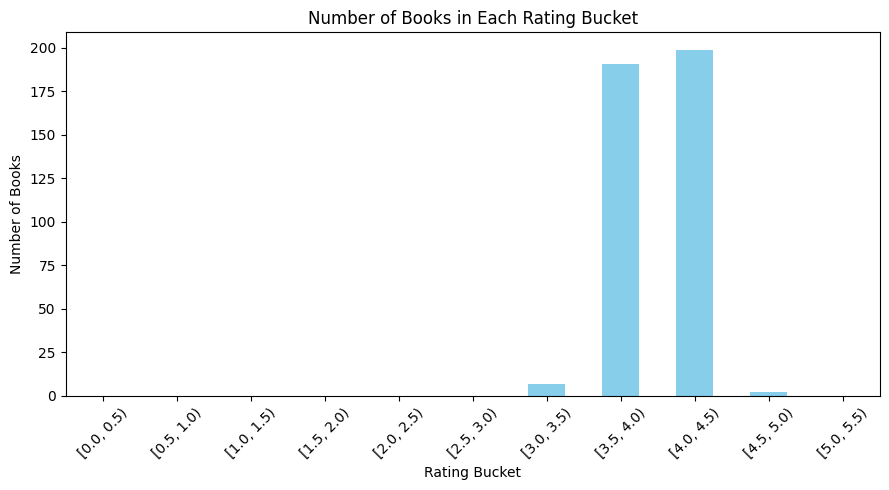

In [19]:
'''
Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding 
(eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

Approach : cut is function used to segement and sort data into bins. 'groupby' groups values together based on some criteria, here "size" is the 
           criteria used to group which counts of occurances within each group.
'''

bin_edges = [x / 2 for x in range(0, 12)]  # [0, 0.5, 1.0, ..., 5.0]
data['rating_bucket'] = pd.cut(data['average_rating'], bins=bin_edges, right=False)
books_per_bucket = data['rating_bucket'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(9, 5))
books_per_bucket.plot(kind='bar', color='skyblue')
plt.title('Number of Books in Each Rating Bucket')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()